# Minimizing churn rate through analysis of financial habits

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data = pd.read_csv('churn_data.csv')

In [3]:
data.head()

,user,churn,age,housing,credit_score,deposits,withdrawal,purchases_partners,purchases,cc_taken,...,waiting_4_loan,cancelled_loan,received_loan,rejected_loan,zodiac_sign,left_for_two_month_plus,left_for_one_month,rewards_earned,reward_rate,is_referred
0,55409,0,37.0,na,NaN,0,0,0,0,0,...,0,0,0,0,Leo,1,0,NaN,0.00,0
1,23547,0,28.0,R,486.0,0,0,1,0,0,...,0,0,0,0,Leo,0,0,44.0,1.47,1
2,58313,0,35.0,R,561.0,47,2,86,47,0,...,0,0,0,0,Capricorn,1,0,65.0,2.17,0
3,8095,0,26.0,R,567.0,26,3,38,25,0,...,0,0,0,0,Capricorn,0,0,33.0,1.10,1
4,61353,1,27.0,na,NaN,0,0,2,0,0,...,0,0,0,0,Aries,1,0,1.0,0.03,0


In [4]:
#data.dtypes 
data.describe()

,user,churn,age,credit_score,deposits,withdrawal,purchases_partners,purchases,cc_taken,cc_recommended,...,registered_phones,waiting_4_loan,cancelled_loan,received_loan,rejected_loan,left_for_two_month_plus,left_for_one_month,rewards_earned,reward_rate,is_referred
count,27000.000000,27000.000000,26996.000000,18969.000000,27000.000000,27000.000000,27000.000000,27000.000000,27000.000000,27000.000000,...,27000.000000,27000.000000,27000.000000,27000.000000,27000.000000,27000.000000,27000.000000,23773.000000,27000.000000,27000.000000
mean,35422.702519,0.413852,32.219921,542.944225,3.341556,0.307000,28.062519,3.273481,0.073778,92.625778,...,0.420926,0.001296,0.018815,0.018185,0.004889,0.173444,0.018074,29.110125,0.907684,0.318037
std,20321.006678,0.492532,9.964838,61.059315,9.131406,1.055416,42.219686,8.953077,0.437299,88.869343,...,0.912831,0.035981,0.135873,0.133623,0.069751,0.378638,0.133222,21.973478,0.752016,0.465723
min,1.000000,0.000000,17.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000
25%,17810.500000,0.000000,25.000000,507.000000,0.000000,0.000000,0.000000,0.000000,0.000000,10.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,9.000000,0.200000,0.000000
50%,35749.000000,0.000000,30.000000,542.000000,0.000000,0.000000,9.000000,0.000000,0.000000,65.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,25.000000,0.780000,0.000000
75%,53244.250000,1.000000,37.000000,578.000000,1.000000,0.000000,43.000000,1.000000,0.000000,164.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,48.000000,1.530000,1.000000
max,69658.000000,1.000000,91.000000,838.000000,65.000000,29.000000,1067.000000,63.000000,29.000000,522.000000,...,5.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,114.000000,4.000000,1.000000


In [5]:
data.isnull().sum()

user                          0
churn                         0
age                           4
housing                       0
credit_score               8031
deposits                      0
withdrawal                    0
purchases_partners            0
purchases                     0
cc_taken                      0
cc_recommended                0
cc_disliked                   0
cc_liked                      0
cc_application_begin          0
app_downloaded                0
web_user                      0
app_web_user                  0
ios_user                      0
android_user                  0
registered_phones             0
payment_type                  0
waiting_4_loan                0
cancelled_loan                0
received_loan                 0
rejected_loan                 0
zodiac_sign                   0
left_for_two_month_plus       0
left_for_one_month            0
rewards_earned             3227
reward_rate                   0
is_referred                   0
dtype: i

## Handling missing data

In [6]:
data = data.drop(['credit_score', 'rewards_earned'], axis=1)

In [7]:
age = data['age'].median()
age

30.0

In [8]:
data['age'] = data['age'].fillna(age)

In [9]:
data

,user,churn,age,housing,deposits,withdrawal,purchases_partners,purchases,cc_taken,cc_recommended,...,payment_type,waiting_4_loan,cancelled_loan,received_loan,rejected_loan,zodiac_sign,left_for_two_month_plus,left_for_one_month,reward_rate,is_referred
0,55409,0,37.0,na,0,0,0,0,0,0,...,Bi-Weekly,0,0,0,0,Leo,1,0,0.00,0
1,23547,0,28.0,R,0,0,1,0,0,96,...,Weekly,0,0,0,0,Leo,0,0,1.47,1
2,58313,0,35.0,R,47,2,86,47,0,285,...,Semi-Monthly,0,0,0,0,Capricorn,1,0,2.17,0
3,8095,0,26.0,R,26,3,38,25,0,74,...,Bi-Weekly,0,0,0,0,Capricorn,0,0,1.10,1
4,61353,1,27.0,na,0,0,2,0,0,0,...,Bi-Weekly,0,0,0,0,Aries,1,0,0.03,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26995,24291,1,24.0,R,0,0,0,0,0,81,...,Weekly,0,0,0,0,Leo,0,0,1.07,1
26996,4116,1,26.0,na,0,0,2,0,0,1,...,Bi-Weekly,0,0,0,1,Cancer,1,0,0.67,0
26997,23740,0,22.0,na,0,0,37,0,0,98,...,Bi-Weekly,0,0,0,0,Taurus,0,0,0.93,0
26998,47663,1,46.0,na,2,0,16,2,0,58,...,Semi-Monthly,0,0,0,0,Aries,1,0,0.90,1


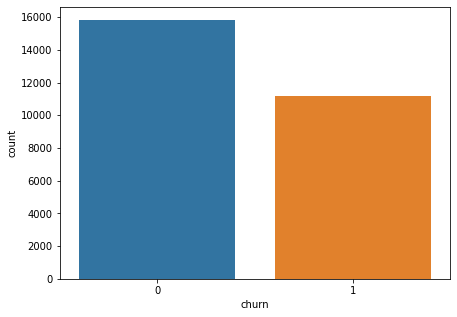

In [10]:
plt.figure(figsize=(7,5))
sns.countplot(data['churn'])
plt.show()

# Exploratory Data Analysis

### Histograms

In [11]:
num = [f for f in data if data[f].dtypes !='O']

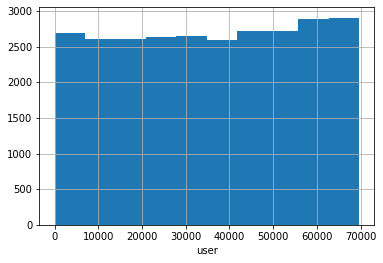

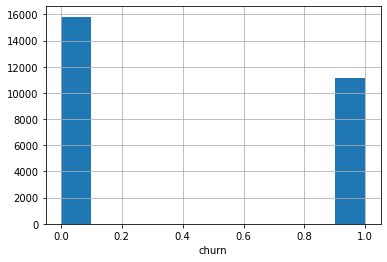

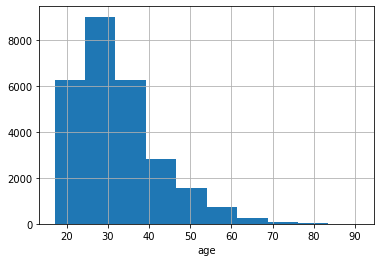

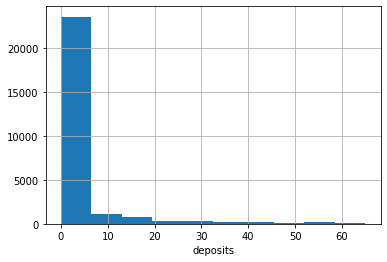

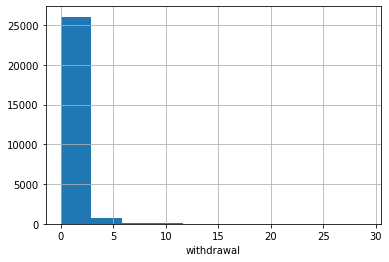

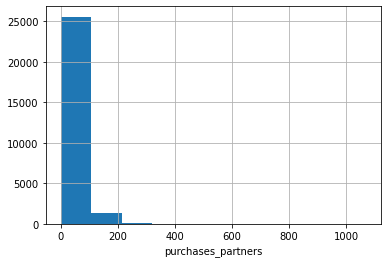

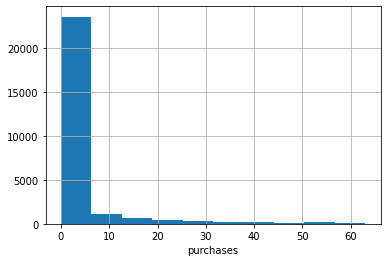

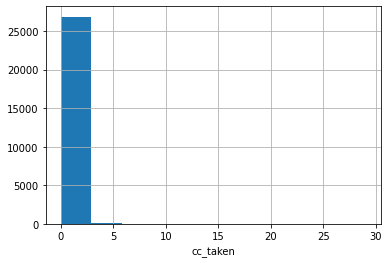

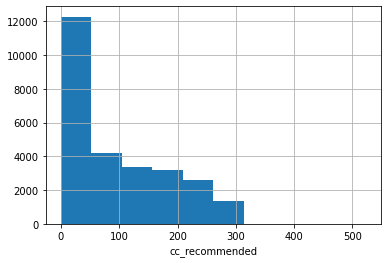

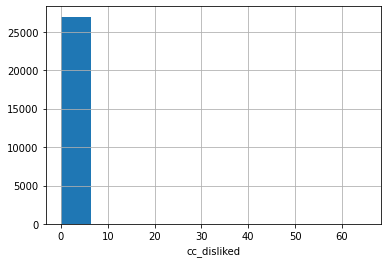

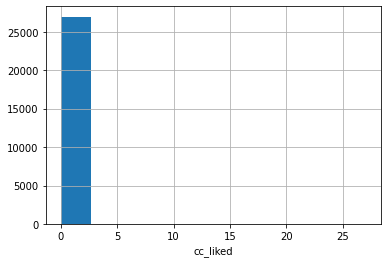

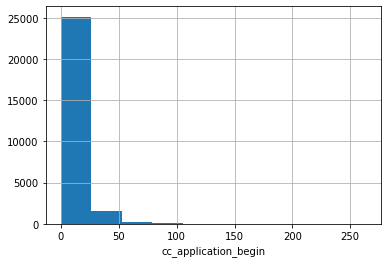

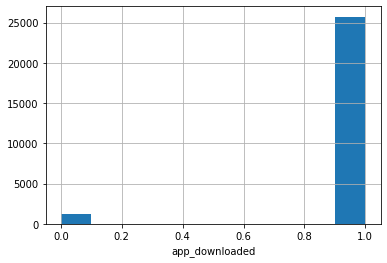

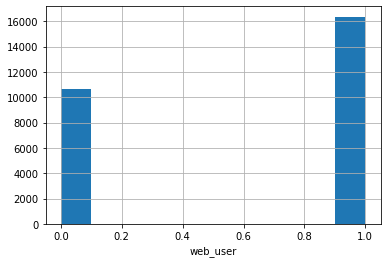

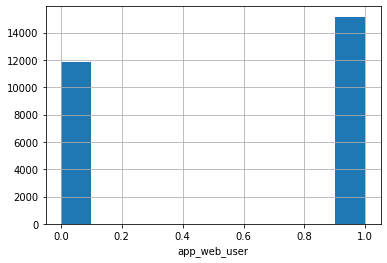

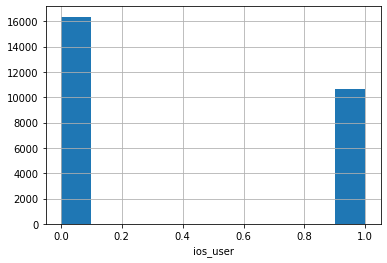

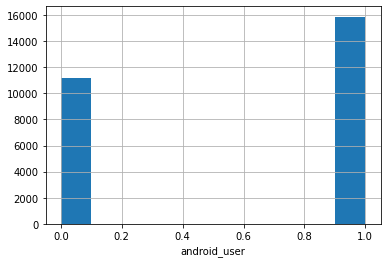

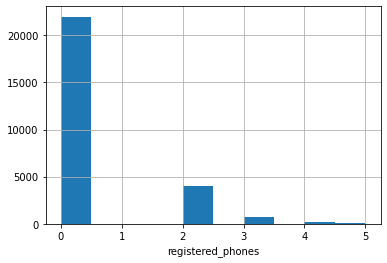

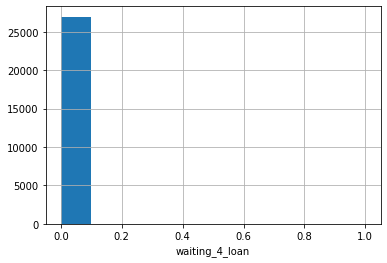

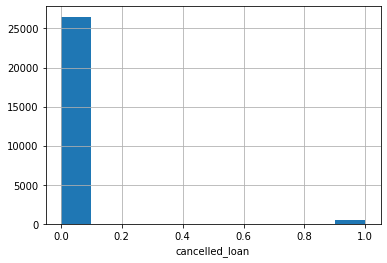

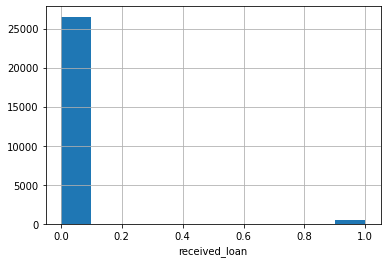

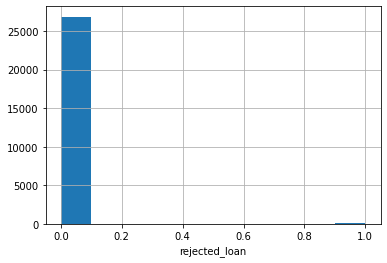

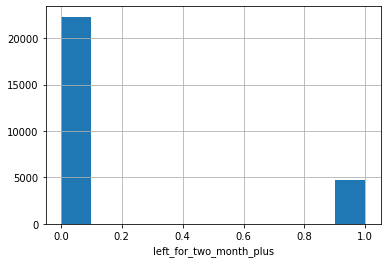

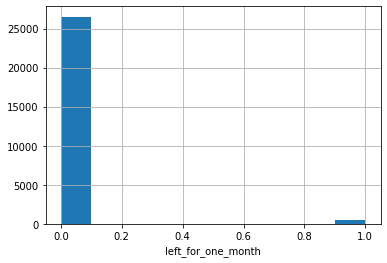

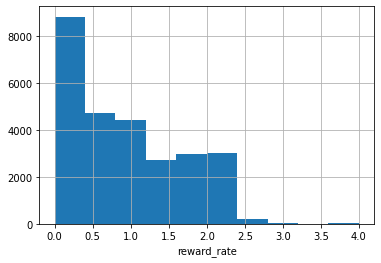

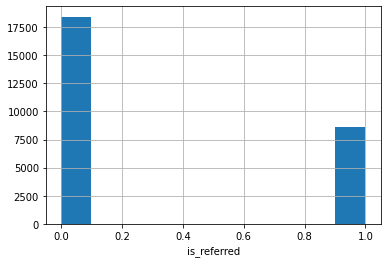

In [12]:
for f in num:
    dataC = data.copy()
    dataC[f].hist()
    plt.xlabel(f)
    plt.show()

### Visualizing Categorical Features

In [13]:
obj = [f for f in data if data[f].dtypes == 'O']

In [14]:
obj

['housing', 'payment_type', 'zodiac_sign']

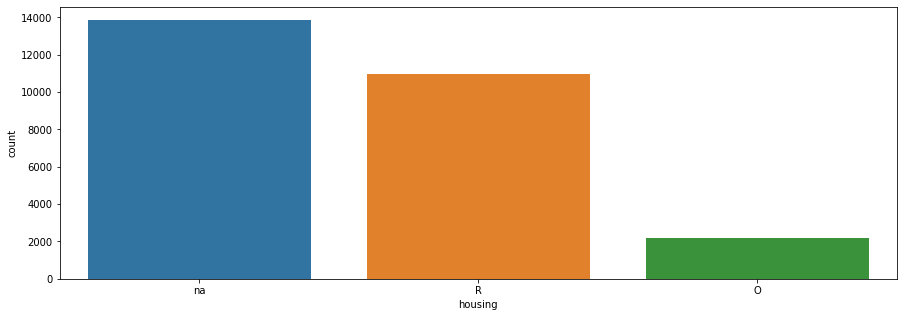

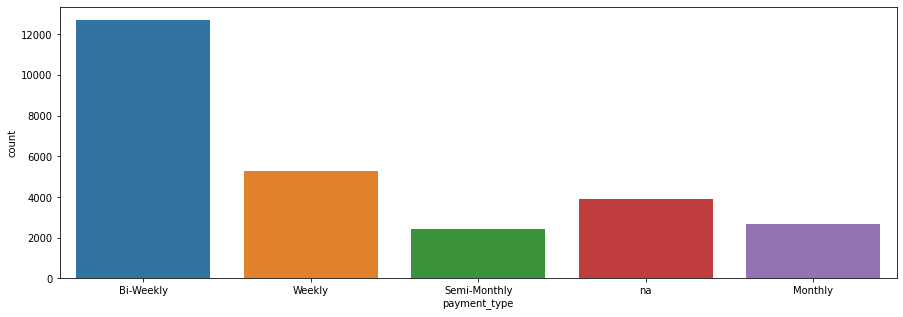

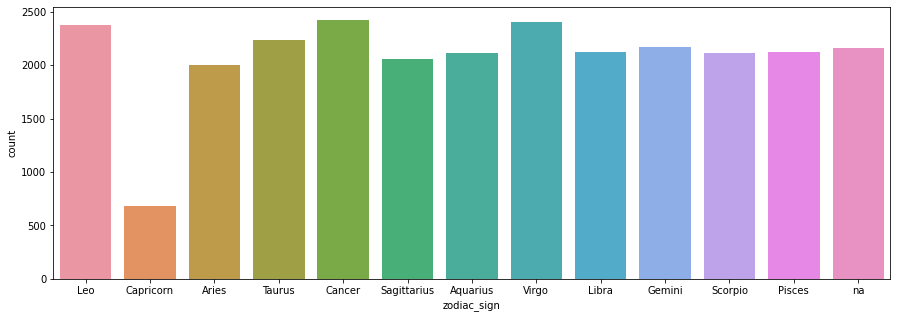

In [15]:
plt.rcParams['figure.figsize'] = (15, 5)
for f in obj:
    dataC = data.copy()
    sns.countplot(data[f])
    plt.show()

## ALL Categorical Varibles

In [16]:
d2 = data[['housing', 'is_referred', 'app_downloaded',
                    'web_user', 'app_web_user', 'ios_user',
                    'android_user', 'registered_phones', 'payment_type',
                    'waiting_4_loan', 'cancelled_loan',
                    'received_loan', 'rejected_loan', 'zodiac_sign',
                    'left_for_two_month_plus', 'left_for_one_month', 'is_referred']].copy()

In [17]:
d2.shape

(27000, 17)

In [18]:
d2

,housing,is_referred,app_downloaded,web_user,app_web_user,ios_user,android_user,registered_phones,payment_type,waiting_4_loan,cancelled_loan,received_loan,rejected_loan,zodiac_sign,left_for_two_month_plus,left_for_one_month,is_referred
0,na,0,1,1,1,1,0,0,Bi-Weekly,0,0,0,0,Leo,1,0,0
1,R,1,1,1,1,1,0,0,Weekly,0,0,0,0,Leo,0,0,1
2,R,0,1,0,0,0,1,2,Semi-Monthly,0,0,0,0,Capricorn,1,0,0
3,R,1,1,0,0,0,1,0,Bi-Weekly,0,0,0,0,Capricorn,0,0,1
4,na,0,1,1,1,0,1,0,Bi-Weekly,0,0,0,0,Aries,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26995,R,1,1,1,1,0,1,2,Weekly,0,0,0,0,Leo,0,0,1
26996,na,0,1,1,1,0,1,0,Bi-Weekly,0,0,0,1,Cancer,1,0,0
26997,na,0,1,1,1,0,1,0,Bi-Weekly,0,0,0,0,Taurus,0,0,0
26998,na,1,1,1,1,1,0,0,Semi-Monthly,0,0,0,0,Aries,1,0,1


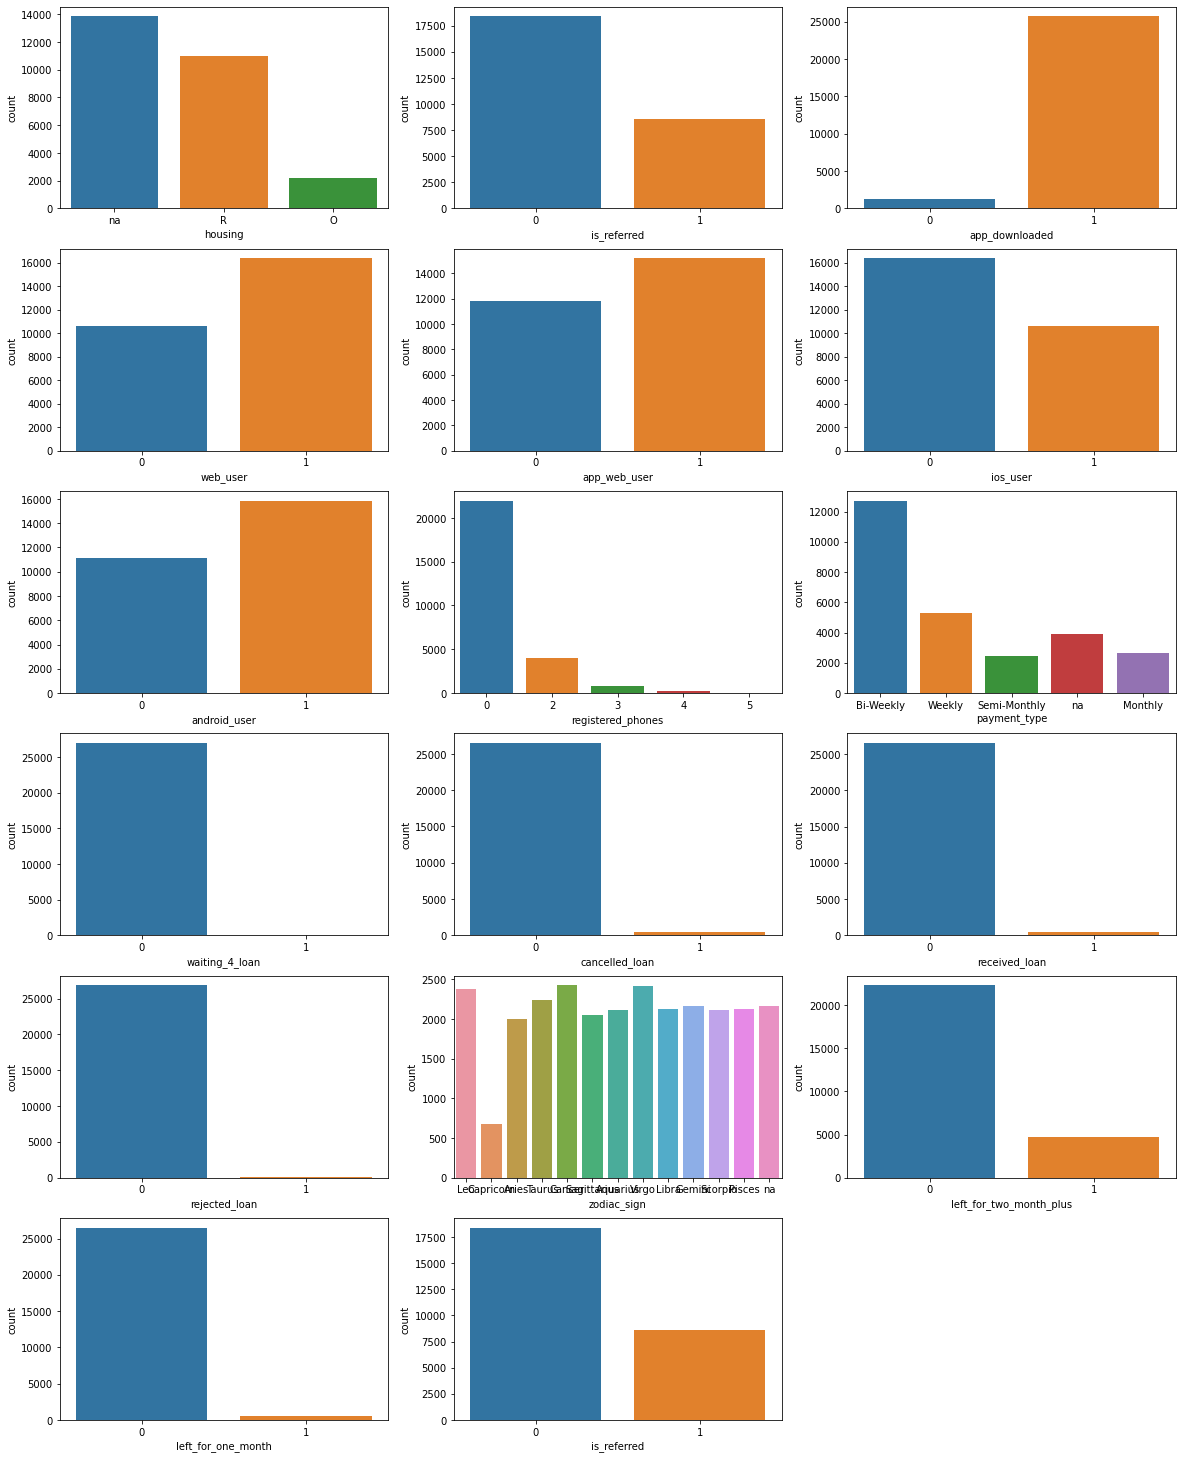

In [19]:
fig = plt.figure(figsize=(20, 26))

for i in range(1, d2.shape[1] + 1):
    plt.subplot(6,3,i)
    f = plt.gca()
    sns.countplot(d2.iloc[:, i-1])

In [20]:
data['waiting_4_loan'].value_counts()

0    26965
1       35
Name: waiting_4_loan, dtype: int64

In [21]:
data[data['waiting_4_loan']== 1].churn.value_counts()

0    27
1     8
Name: churn, dtype: int64

In [22]:
data[data['cancelled_loan']== 1].churn.value_counts()

1    274
0    234
Name: churn, dtype: int64

In [23]:
data[data['received_loan']== 1].churn.value_counts()

1    292
0    199
Name: churn, dtype: int64

In [24]:
data[data['rejected_loan']== 1].churn.value_counts()

1    107
0     25
Name: churn, dtype: int64

In [25]:
data[data['left_for_one_month']== 1].churn.value_counts()

1    266
0    222
Name: churn, dtype: int64

# Correlation with Churn Variable

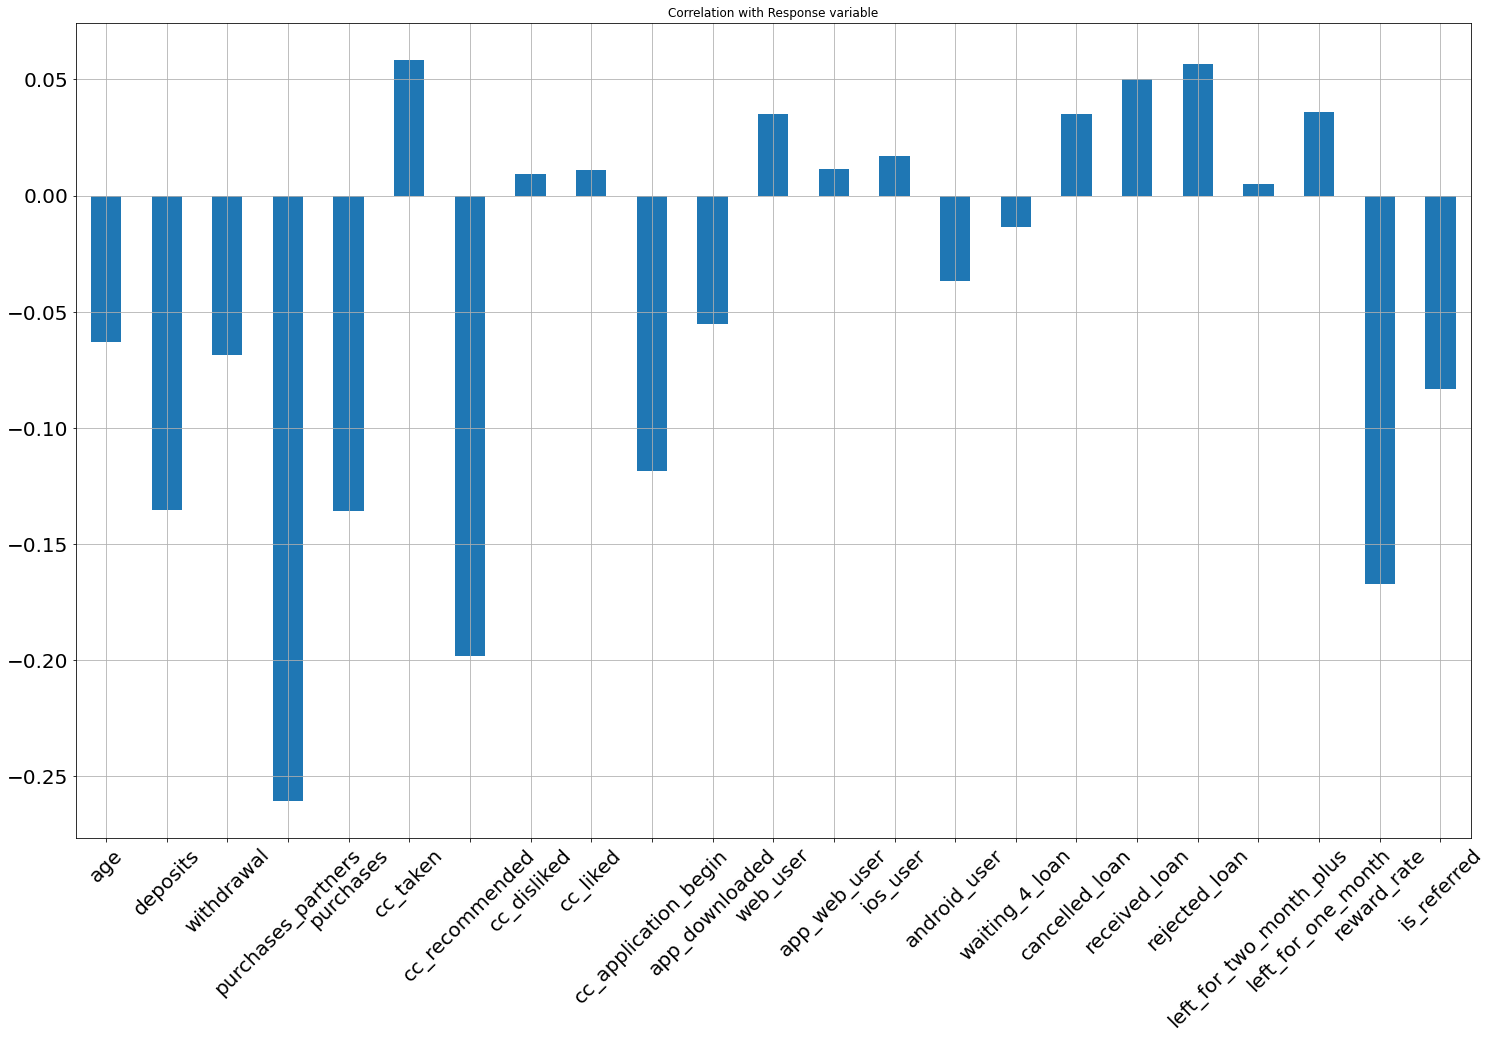

In [26]:
data.drop(columns = ['user', 'housing', 'payment_type',
                    'registered_phones', 'zodiac_sign', 'churn']).corrwith(data['churn']).plot.bar(figsize=(25,15),
              title = 'Correlation with Response variable',
              fontsize = 20, rot = 45,
              grid = True)

### Negatively Corelated
- Smaller the age more likely it is to churn
- less the deposits and witdrawals more likely it is to churn 
- Similarly with the purchases , cc recommended etc. We can see from the correlation plot above
......

### Correlated 
- The people who have taken Credit Card are more likely to churn means there is issue in our credit card or its features
- Also the web and iOS users are more likely to churn than ANdroid Users means that the iOS and web application have issue and need to be fixed


# Correlation Matrix

In [27]:
newD = data.drop(['user', 'churn'], axis=1)

In [28]:
corr = newD.corr()

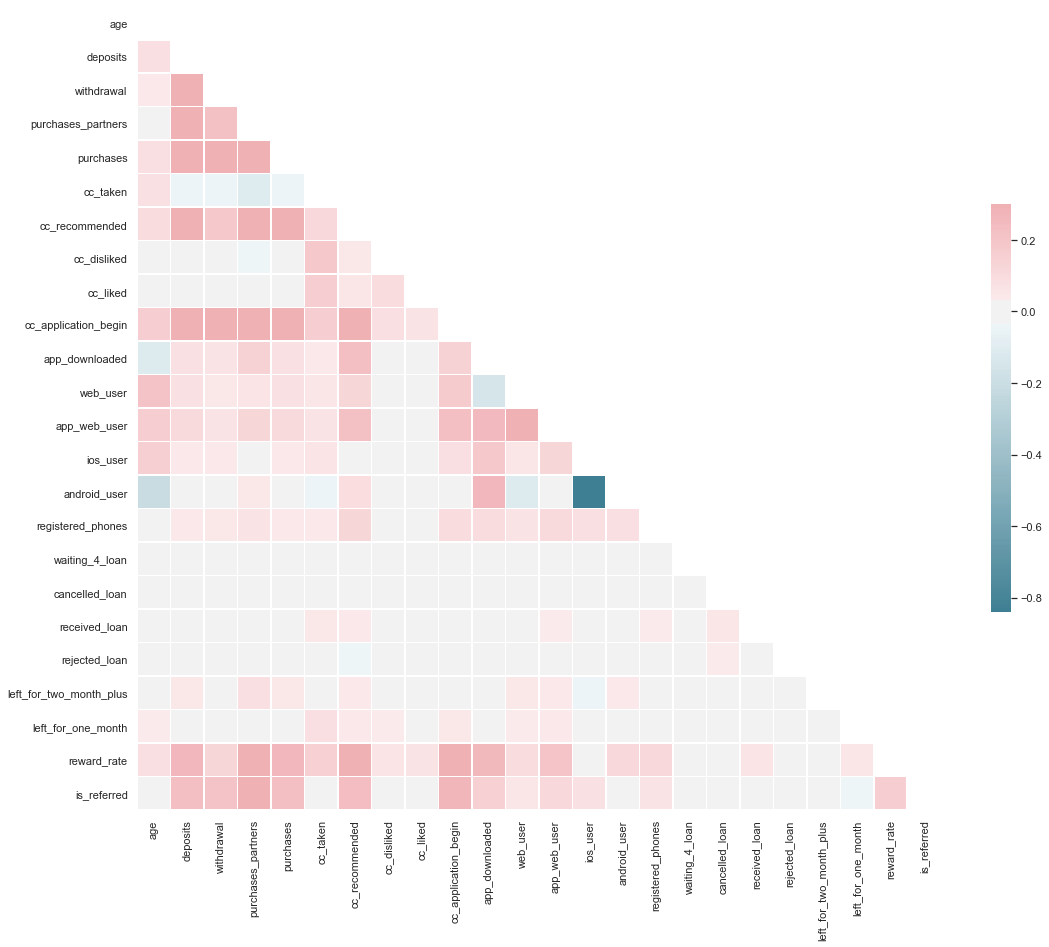

In [29]:
#I got this Matrix code from Superdatascience

sns.set(style="white")

mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

f, ax = plt.subplots(figsize=(18, 15))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})


- We can see android_user and iOS_user are high relation and it is obvious that the android user cannot be iOS user and vice versa

In [30]:
data = data.drop(['app_web_user'], axis=1)

In [31]:
data

,user,churn,age,housing,deposits,withdrawal,purchases_partners,purchases,cc_taken,cc_recommended,...,payment_type,waiting_4_loan,cancelled_loan,received_loan,rejected_loan,zodiac_sign,left_for_two_month_plus,left_for_one_month,reward_rate,is_referred
0,55409,0,37.0,na,0,0,0,0,0,0,...,Bi-Weekly,0,0,0,0,Leo,1,0,0.00,0
1,23547,0,28.0,R,0,0,1,0,0,96,...,Weekly,0,0,0,0,Leo,0,0,1.47,1
2,58313,0,35.0,R,47,2,86,47,0,285,...,Semi-Monthly,0,0,0,0,Capricorn,1,0,2.17,0
3,8095,0,26.0,R,26,3,38,25,0,74,...,Bi-Weekly,0,0,0,0,Capricorn,0,0,1.10,1
4,61353,1,27.0,na,0,0,2,0,0,0,...,Bi-Weekly,0,0,0,0,Aries,1,0,0.03,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26995,24291,1,24.0,R,0,0,0,0,0,81,...,Weekly,0,0,0,0,Leo,0,0,1.07,1
26996,4116,1,26.0,na,0,0,2,0,0,1,...,Bi-Weekly,0,0,0,1,Cancer,1,0,0.67,0
26997,23740,0,22.0,na,0,0,37,0,0,98,...,Bi-Weekly,0,0,0,0,Taurus,0,0,0.93,0
26998,47663,1,46.0,na,2,0,16,2,0,58,...,Semi-Monthly,0,0,0,0,Aries,1,0,0.90,1


## Data Preparation

In [32]:
user = data['user']

In [33]:
data = data.drop(['user'], axis=1)

## One Hot Encoding

In [34]:
data['housing'].value_counts() 

na    13860
R     10969
O      2171
Name: housing, dtype: int64

In [35]:
data['payment_type'].value_counts() 

Bi-Weekly       12716
Weekly           5289
na               3899
Monthly          2656
Semi-Monthly     2440
Name: payment_type, dtype: int64

In [36]:
data['zodiac_sign'].value_counts() 

Cancer         2424
Virgo          2410
Leo            2374
Taurus         2236
Gemini         2168
na             2159
Libra          2128
Pisces         2127
Scorpio        2118
Aquarius       2117
Sagittarius    2056
Aries          2001
Capricorn       682
Name: zodiac_sign, dtype: int64

In [37]:
data = pd.get_dummies(data)

In [38]:
data

,churn,age,deposits,withdrawal,purchases_partners,purchases,cc_taken,cc_recommended,cc_disliked,cc_liked,...,zodiac_sign_Capricorn,zodiac_sign_Gemini,zodiac_sign_Leo,zodiac_sign_Libra,zodiac_sign_Pisces,zodiac_sign_Sagittarius,zodiac_sign_Scorpio,zodiac_sign_Taurus,zodiac_sign_Virgo,zodiac_sign_na
0,0,37.0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
1,0,28.0,0,0,1,0,0,96,0,0,...,0,0,1,0,0,0,0,0,0,0
2,0,35.0,47,2,86,47,0,285,0,0,...,1,0,0,0,0,0,0,0,0,0
3,0,26.0,26,3,38,25,0,74,0,0,...,1,0,0,0,0,0,0,0,0,0
4,1,27.0,0,0,2,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26995,1,24.0,0,0,0,0,0,81,0,0,...,0,0,1,0,0,0,0,0,0,0
26996,1,26.0,0,0,2,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
26997,0,22.0,0,0,37,0,0,98,0,0,...,0,0,0,0,0,0,0,1,0,0
26998,1,46.0,2,0,16,2,0,58,0,0,...,0,0,0,0,0,0,0,0,0,0


In [39]:
data = data.drop(['housing_na', 'zodiac_sign_na', 'payment_type_na'], axis=1)

## Train - Test Split

In [40]:
from sklearn.model_selection import train_test_split

In [41]:
xtrain, xtest, ytrain, ytest = train_test_split(data.drop(['churn'], axis=1), data['churn'], test_size=0.2, random_state=0)

In [42]:
xtrain

,age,deposits,withdrawal,purchases_partners,purchases,cc_taken,cc_recommended,cc_disliked,cc_liked,cc_application_begin,...,zodiac_sign_Cancer,zodiac_sign_Capricorn,zodiac_sign_Gemini,zodiac_sign_Leo,zodiac_sign_Libra,zodiac_sign_Pisces,zodiac_sign_Sagittarius,zodiac_sign_Scorpio,zodiac_sign_Taurus,zodiac_sign_Virgo
9184,38.0,0,0,65,0,0,102,0,0,5,...,0,0,0,0,0,0,0,0,1,0
16892,42.0,0,0,5,0,0,51,0,0,5,...,0,0,0,0,0,0,0,0,0,0
18214,26.0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
15551,24.0,0,0,3,0,0,19,0,0,3,...,0,0,0,1,0,0,0,0,0,0
7201,27.0,0,0,57,0,0,120,0,0,7,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13123,34.0,0,0,8,0,0,218,0,0,5,...,0,0,0,0,0,0,0,0,0,0
19648,22.0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
9845,33.0,1,0,58,1,0,114,0,0,47,...,0,0,0,0,1,0,0,0,0,0
10799,36.0,0,0,0,0,0,166,0,0,50,...,0,0,0,0,0,0,0,0,0,0


# Feature Scaling

In [43]:
from sklearn.preprocessing import StandardScaler

In [44]:
sc = StandardScaler()

In [45]:
xtrain2 = pd.DataFrame(sc.fit_transform(xtrain))
xtest2 = pd.DataFrame(sc.transform(xtest))

In [46]:
xtrain2.columns = xtrain.columns.values

In [47]:
xtest2.columns = xtest.columns.values

In [48]:
xtrain2.index = xtrain.index.values
xtest2.index = xtest.index.values

In [49]:
xtrain = xtrain2
xtest = xtest2

# Model Building

In [50]:
from sklearn.linear_model import LogisticRegression

In [51]:
model = LogisticRegression(random_state=0)

In [52]:
model.fit(xtrain, ytrain)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=0, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [53]:
predict = model.predict(xtest)

In [54]:
model.score(xtest, ytest)

0.6435185185185185

In [55]:
from sklearn.metrics import confusion_matrix, precision_score, recall_score

In [56]:
precision_score(ytest, predict)

0.5849462365591398

In [57]:
recall_score(ytest, predict)

0.4854975457385096

A system with high precision but low recall is, returning very few results, but most of its predicted labels are correct when compared to the training labels

# Confusion Matix

In [58]:
cm = confusion_matrix(ytest, predict)

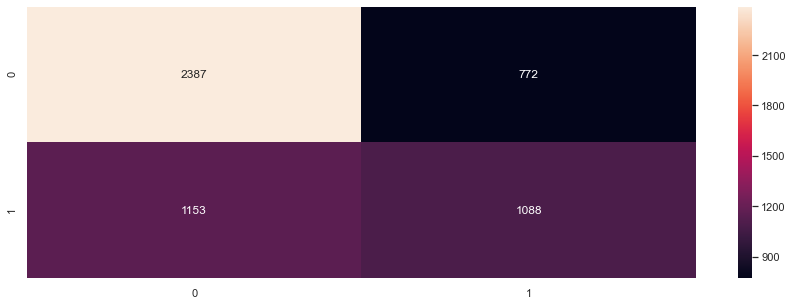

In [59]:
sns.heatmap(cm, annot=True, fmt='g')

In [60]:
from sklearn.model_selection import cross_val_score
accuracies = cross_val_score(estimator = model,
                             X = xtrain ,
                             y = ytrain, cv = 10)
print(" Accuracy: %0.3f " % (accuracies.mean() ))

 Accuracy: 0.651 


# Feature Selection

In [61]:
from sklearn.feature_selection import RFE

In [63]:
rfe = RFE(model, 20)
rfe = rfe.fit(xtrain, ytrain)

In [64]:
xtrain.columns[rfe.support_]

Index(['age', 'deposits', 'withdrawal', 'purchases_partners', 'purchases',
       'cc_taken', 'cc_recommended', 'web_user', 'ios_user',
       'registered_phones', 'cancelled_loan', 'received_loan', 'rejected_loan',
       'left_for_two_month_plus', 'left_for_one_month', 'reward_rate',
       'housing_O', 'housing_R', 'payment_type_Bi-Weekly',
       'payment_type_Weekly'],
      dtype='object')

In [65]:
model2 = LogisticRegression(random_state=0)

In [66]:
model2.fit(xtrain[xtrain.columns[rfe.support_]], ytrain)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=0, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [67]:
predict2 = model2.predict(xtest[xtest.columns[rfe.support_]])

In [68]:
model2.score(xtest[xtest.columns[rfe.support_]], ytest)

0.6424074074074074

In [69]:
precision_score(ytest, predict2)

0.5836030204962244

In [70]:
cm2 = confusion_matrix(ytest, predict2)

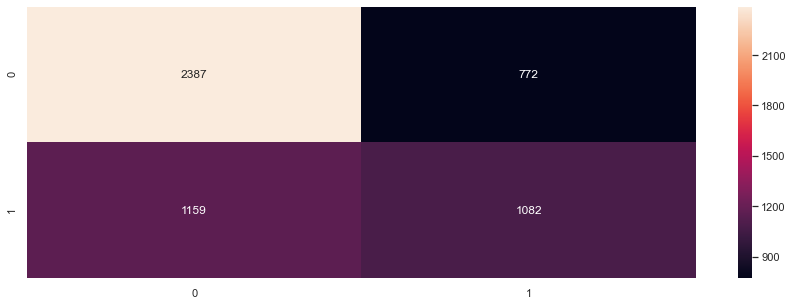

In [71]:
sns.heatmap(cm2, annot=True, fmt='g')

- #### Feature selection made us understand that only 20 features are good and useful enough for our model to give good accuracy so instead of using all 41 columns we can use only 20 columns to achieve our results.

In [72]:
final_results = pd.concat([ytest, user], axis = 1).dropna()
final_results['predicted_churn'] = predict2
final_results = final_results[['user', 'churn', 'predicted_churn']].reset_index(drop=True)


In [73]:
final_results

,user,churn,predicted_churn
0,61353,1.0,0
1,67679,0.0,0
2,21269,0.0,0
3,69531,0.0,0
4,25997,0.0,0
...,...,...,...
5395,68179,1.0,0
5396,19540,0.0,0
5397,24291,1.0,1
5398,23740,0.0,1
